In [3]:
import os
import pandas as pd

# Define the path to the dataset folder
dataset_path = r"C:\Users\Administrator\Desktop\FinalProject\dataset"

# List all CSV files in the dataset directory
file_list = [file for file in os.listdir(dataset_path) if file.endswith('.csv')]

# Initialize an empty DataFrame to store all the Benzo(a)pyrene data
benzo_data = pd.DataFrame()

# Loop through all files
for file in file_list:
    file_path = os.path.join(dataset_path, file)
    
    # Read each CSV file into a DataFrame
    df = pd.read_csv(file_path)
    
    # Extract year from the file name (assuming the year is the two digits after 'd')
    year = int(file[1:3]) + 2000  # Assuming the year is represented by 'dXX_v3.csv'
    
    # Filter rows where 'SUBSTANCE NAME' is 'Benzo(a)pyrene'
    benzo_subset = df[df['SUBSTANCE NAME'] == 'Benzo(a)pyrene']
    
    # Add a new column 'Year' with the corresponding year
    benzo_subset['Year'] = year
    
    # Append the filtered data to the combined DataFrame
    benzo_data = pd.concat([benzo_data, benzo_subset])

# Save the filtered data with the Year column to a new CSV file
output_path = r"C:\Users\Administrator\Desktop\FinalProject\benzo_a_pyrene_data_with_year.csv"
benzo_data.to_csv(output_path, index=False)

# Optionally, print the first few rows of the final filtered data
print(benzo_data.head())

# Print the location where the final CSV file is saved
print(f"Filtered data saved to: {output_path}")


   AUTHORISATION ID / PERMIT ID       PRIMARY INDUSTRY ACTIVITY DESCRIPTION  \
5                  T/48/12074/R                                         NaN   
8                  T/64/45170/R                                         NaN   
9                  T/53/45014/R                                         NaN   
14                   AWNNF13399                                         NaN   
19                     LP3533LJ  LOADING/STORAGE/TREATMENT ETC OF CRUDE OIL   

                           OPERATOR NAME  \
5                 SEVERN TRENT WATER LTD   
8                 SEVERN TRENT WATER LTD   
9                 SEVERN TRENT WATER LTD   
14                         Anglian Water   
19  Crude Oil Terminals (Humber) Limited   

                                         SITE ADDRESS SITE POSTCODE   EASTING  \
5   Derby Sewage Treatment Works Chp Plant Megalou...      DE21 7BR  438830.0   
8                       Stoke Bardolph STW Nottingham      NG14 5HL  464730.0   
9   Wanlip Sewage

E:\Anaconda\envs\tf\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# 不同年份的排放情况

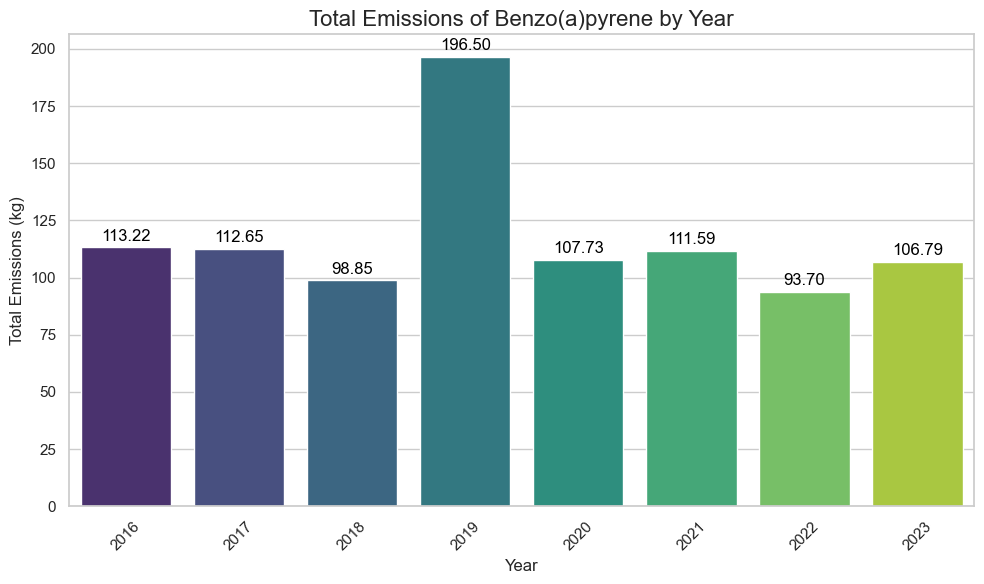

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the path to the dataset folder
dataset_path = r"C:\Users\Administrator\Desktop\FinalProject\dataset"

# Load the dataset
file_path = r"C:\Users\Administrator\Desktop\FinalProject\benzo_a_pyrene_data_with_year.csv"
data = pd.read_csv(file_path)

# Group by 'Year' and sum the 'QUANTITY RELEASED (kg)'
yearly_emissions = data.groupby('Year')['QUANTITY RELEASED (kg)'].sum().reset_index()

# Set the style for the plot
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Year', y='QUANTITY RELEASED (kg)', data=yearly_emissions, palette="viridis")

# Annotate each bar with the corresponding value
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 8), textcoords='offset points')

# Customize the plot with titles and labels
plt.title('Total Emissions of Benzo(a)pyrene by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Emissions (kg)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


# Trend Analysis Over Time

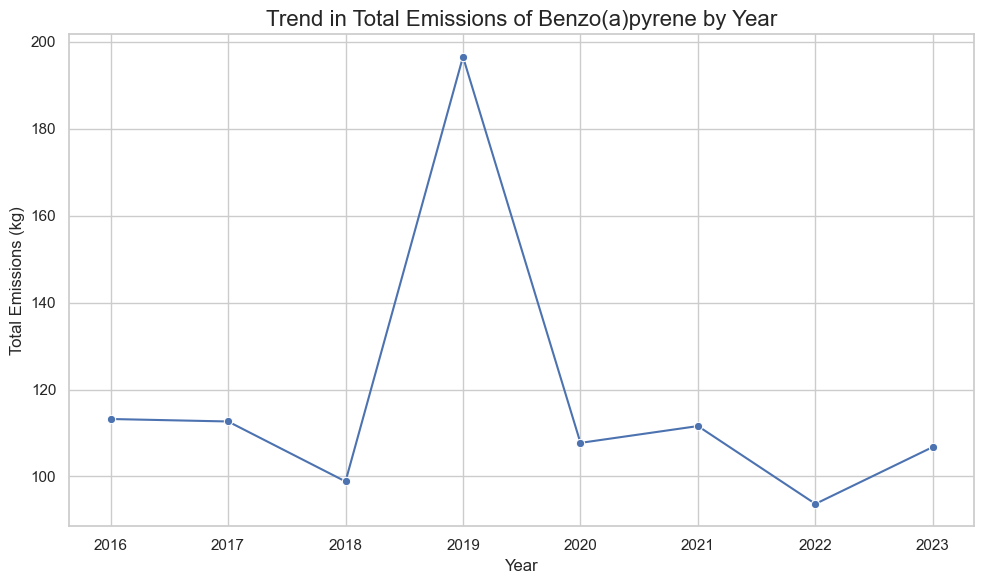

In [6]:
# Create a line plot to visualize the trend in emissions over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='QUANTITY RELEASED (kg)', data=yearly_emissions, marker='o', color='b')

# Customize the plot with titles and labels
plt.title('Trend in Total Emissions of Benzo(a)pyrene by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Emissions (kg)', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


# Year-over-Year Percentage Change

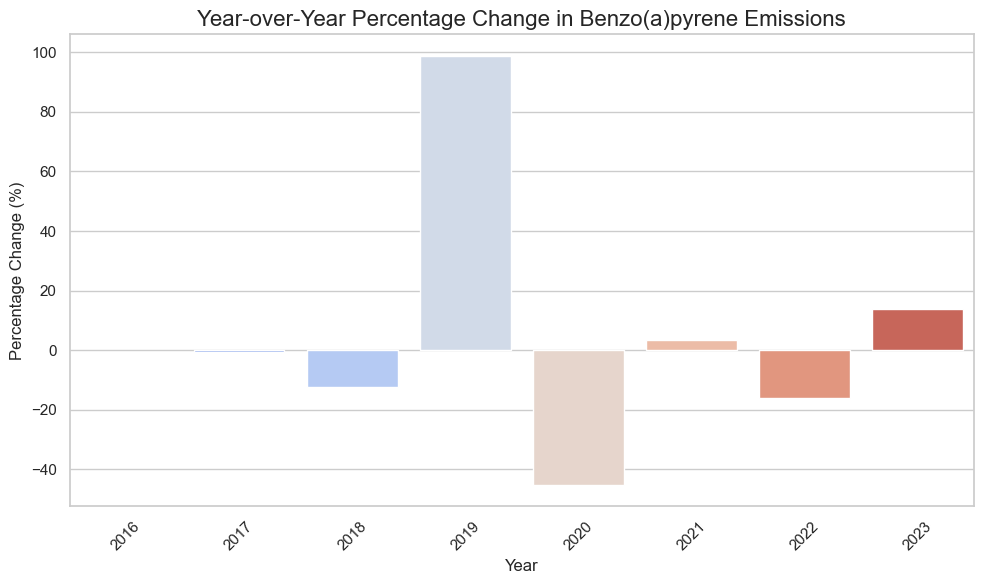

In [7]:
# Calculate year-over-year percentage change
yearly_emissions['YoY Change (%)'] = yearly_emissions['QUANTITY RELEASED (kg)'].pct_change() * 100

# Plot the YoY change
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='YoY Change (%)', data=yearly_emissions, palette="coolwarm")

# Customize the plot with titles and labels
plt.title('Year-over-Year Percentage Change in Benzo(a)pyrene Emissions', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage Change (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


# Correlation with Industry Sector

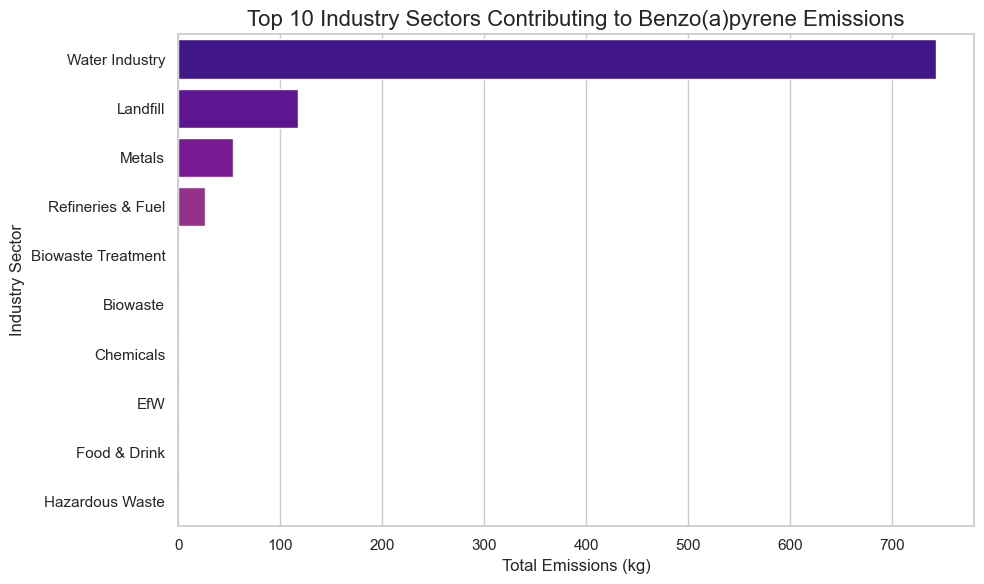

In [8]:
# Group by industry sector and sum the emissions
sector_emissions = data.groupby('REGULATED INDUSTRY SECTOR')['QUANTITY RELEASED (kg)'].sum().reset_index()

# Sort and visualize the top 10 sectors contributing to the most emissions
sector_emissions = sector_emissions.sort_values(by='QUANTITY RELEASED (kg)', ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='QUANTITY RELEASED (kg)', y='REGULATED INDUSTRY SECTOR', data=sector_emissions, palette="plasma")

# Customize the plot with titles and labels
plt.title('Top 10 Industry Sectors Contributing to Benzo(a)pyrene Emissions', fontsize=16)
plt.xlabel('Total Emissions (kg)', fontsize=12)
plt.ylabel('Industry Sector', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


# Emissions by Region

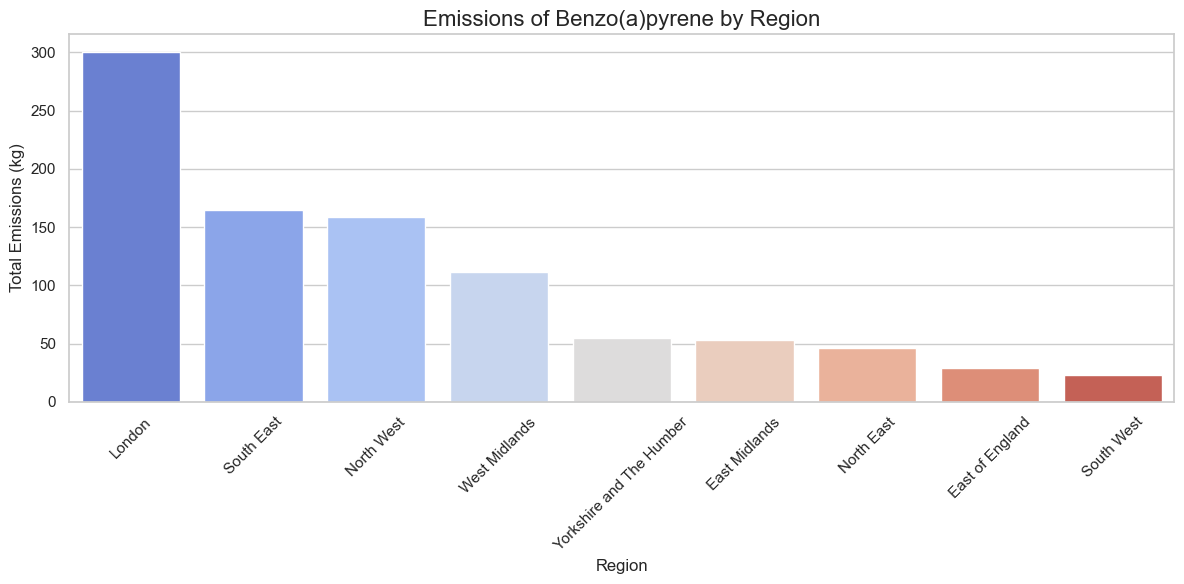

In [12]:
# Group by region and sum the emissions
region_emissions = data.groupby('REGION')['QUANTITY RELEASED (kg)'].sum().reset_index()

# Sort regions by total emissions
region_emissions = region_emissions.sort_values(by='QUANTITY RELEASED (kg)', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='REGION', y='QUANTITY RELEASED (kg)', data=region_emissions, palette="coolwarm")

# Customize the plot with titles and labels
plt.title('Emissions of Benzo(a)pyrene by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Emissions (kg)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


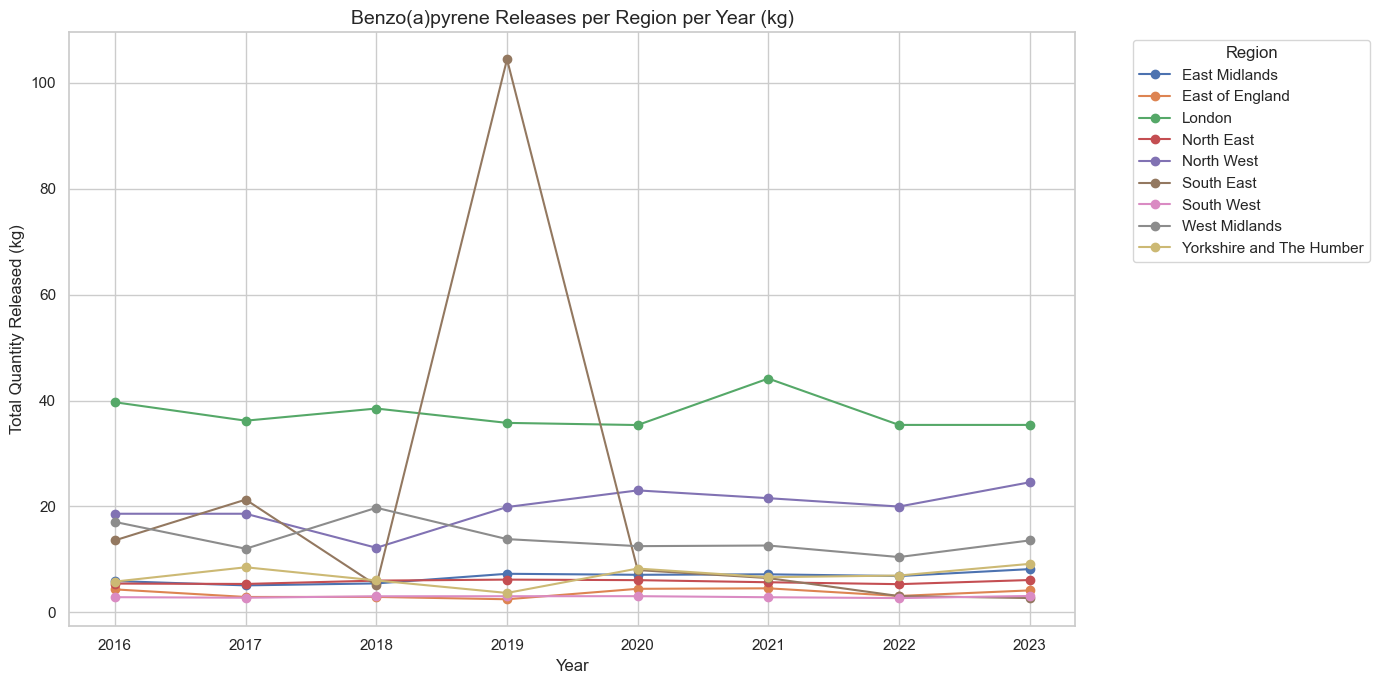

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
file_path = r"C:\Users\Administrator\Desktop\FinalProject\benzo_a_pyrene_data_with_year.csv"
data = pd.read_csv(file_path)

# 筛选出 Benzo(a)pyrene（一般不需要，因为数据集已经是这个物质）
benzo_data = data[data['SUBSTANCE NAME'] == 'Benzo(a)pyrene']

# 按年份和地区统计每年每个地区的总排放量
region_year_group = benzo_data.groupby(['Year', 'REGION'])['QUANTITY RELEASED (kg)'].sum().reset_index()

# 将数据透视为：行是年份，列是地区，值是排放量
pivot_table = region_year_group.pivot(index='Year', columns='REGION', values='QUANTITY RELEASED (kg)').fillna(0)

# 创建折线图
plt.figure(figsize=(14, 7))

# 为每个地区绘制一条线
for column in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[column], marker='o', label=column)

# 图表标题与标签
plt.title('Benzo(a)pyrene Releases per Region per Year (kg)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Quantity Released (kg)', fontsize=12)
plt.xticks(pivot_table.index)  # 显示每年的刻度
plt.grid(True)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# 显示图表
plt.show()


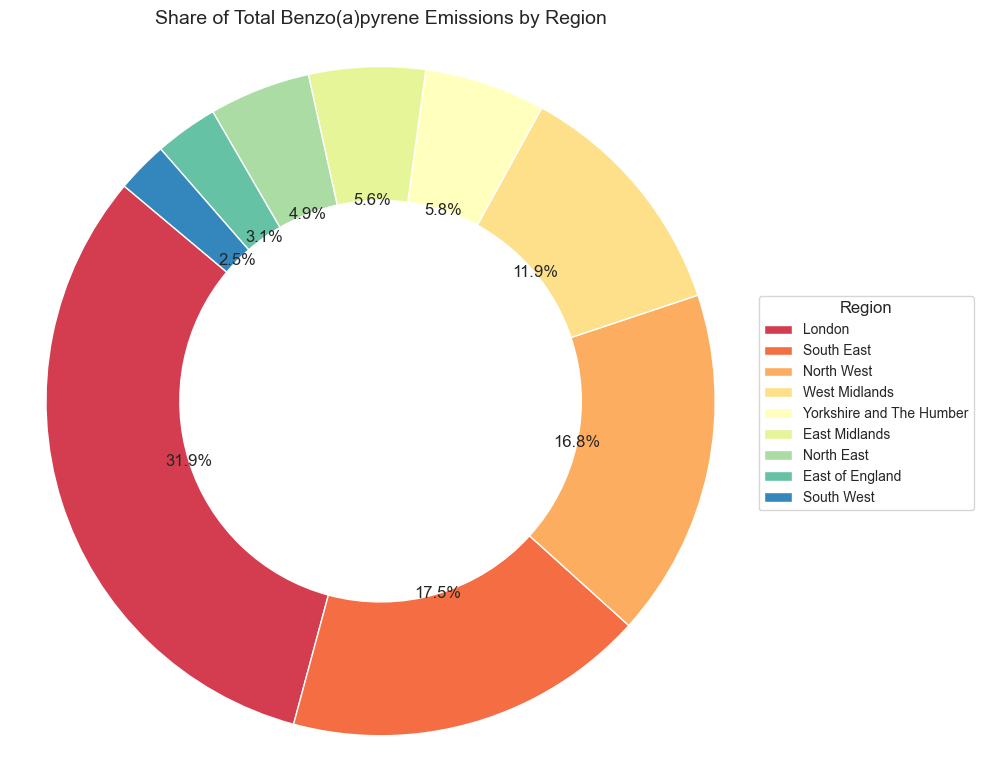

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据
file_path = r"C:\Users\Administrator\Desktop\FinalProject\benzo_a_pyrene_data_with_year.csv"
data = pd.read_csv(file_path)

# 分组求和
benzo_data = data[data['SUBSTANCE NAME'] == 'Benzo(a)pyrene']
region_total = benzo_data.groupby('REGION')['QUANTITY RELEASED (kg)'].sum().sort_values(ascending=False)

# 设置配色
colors = sns.color_palette('Spectral', len(region_total))

# 创建画布
plt.figure(figsize=(10, 8))

# 只显示百分比，不显示名称
wedges, texts, autotexts = plt.pie(
    region_total,
    labels=None,  # 不在扇区内显示地区名
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops=dict(width=0.4)
)

# 添加图例代替标签，放在右侧
plt.legend(
    labels=region_total.index,
    title="Region",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=10
)

# 添加标题
plt.title("Share of Total Benzo(a)pyrene Emissions by Region", fontsize=14)
plt.axis('equal')  # 保持圆形
plt.tight_layout()

# 显示图像
plt.show()


In [15]:
import folium
from folium.plugins import HeatMap
import pandas as pd

# Load the dataset
file_path = r"C:\Users\Administrator\Desktop\FinalProject\benzo_a_pyrene_data_with_year.csv"
data = pd.read_csv(file_path)

# Filter data for Benzo(a)pyrene
benzo_data = data[data['SUBSTANCE NAME'] == 'Benzo(a)pyrene']

# Select relevant columns: Latitude, Longitude, and Quantity Released
heat_data = benzo_data[['Latitude', 'Longitude', 'QUANTITY RELEASED (kg)']]

# Create a map centered around the UK (You can adjust this to your region of interest)
map_center = [53.0, -1.5]  # Coordinates for the UK
m = folium.Map(location=map_center, zoom_start=6)

# Prepare the heatmap data (coordinates and intensity values)
heat_data_points = [[row['Latitude'], row['Longitude'], row['QUANTITY RELEASED (kg)']] for index, row in heat_data.iterrows()]

# Add heatmap layer to the map
HeatMap(heat_data_points, radius=15, blur=10, max_zoom=13).add_to(m)

# Save the map to an HTML file
output_path = r"C:\Users\Administrator\Desktop\FinalProject\benzo_a_pyrene_heatmap.html"
m.save(output_path)

print(f"Heatmap saved to: {output_path}")


Heatmap saved to: C:\Users\Administrator\Desktop\FinalProject\benzo_a_pyrene_heatmap.html


In [16]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = r"C:\Users\Administrator\Desktop\FinalProject\benzo_a_pyrene_data_with_year.csv"
data = pd.read_csv(file_path)

# Filter data for Benzo(a)pyrene
benzo_data = data[data['SUBSTANCE NAME'] == 'Benzo(a)pyrene']

# 1. Calculate total quantity released statistics
total_quantity = benzo_data['QUANTITY RELEASED (kg)']

# Mean, standard deviation, min, max
mean = total_quantity.mean()
std_dev = total_quantity.std()
min_val = total_quantity.min()
max_val = total_quantity.max()

# Percentiles
percentiles = np.percentile(total_quantity, [5, 10, 25, 50, 75, 90, 95])
percentile_5 = percentiles[0]
percentile_10 = percentiles[1]
percentile_25 = percentiles[2]
percentile_50 = percentiles[3]
percentile_75 = percentiles[4]
percentile_90 = percentiles[5]
percentile_95 = percentiles[6]

# 2. Reporting threshold (assuming 1 for this example)
reporting_threshold = 1

# Number of observations
num_obs = len(benzo_data)

# Number of observations below reporting threshold
num_below_threshold = len(benzo_data[benzo_data['QUANTITY RELEASED (kg)'] < reporting_threshold])

# Number of different sites (assuming 'SITE ADDRESS' is the column for site)
num_sites = benzo_data['SITE ADDRESS'].nunique()

# Mean number of years per site
num_years_per_site = benzo_data.groupby('SITE ADDRESS')['Year'].nunique().mean()

# Share of observations from urban areas (assuming 'REGION' indicates urban areas)
urban_area_shares = benzo_data['REGION'].value_counts(normalize=True) * 100

# Share of samples from different regions (North East, North West, etc.)
region_shares = benzo_data['REGION'].value_counts(normalize=True) * 100

# Share of samples from different years
year_shares = benzo_data['Year'].value_counts(normalize=True) * 100

# Prepare the results dictionary
results = {
    "Mean": mean,
    "Standard deviation": std_dev,
    "Min": min_val,
    "Max": max_val,
    "5th Percentile": percentile_5,
    "10th Percentile": percentile_10,
    "25th Percentile": percentile_25,
    "50th Percentile": percentile_50,
    "75th Percentile": percentile_75,
    "90th Percentile": percentile_90,
    "95th Percentile": percentile_95,
    "Reporting threshold": reporting_threshold,
    "Nb of Obs": num_obs,
    "Nb of Obs below reporting threshold": num_below_threshold,
    "Nb of different sites": num_sites,
    "Mean nb years per sites": num_years_per_site,
    "Share of obs from urban areas": urban_area_shares,
    "Share of samples from regions": region_shares,
    "Share of samples from years": year_shares
}

# Print the results
for key, value in results.items():
    print(f"{key}: {value}")


Mean: 0.7504261722488039
Standard deviation: 3.4176722995727506
Min: 0.0
Max: 100.0
5th Percentile: 0.0
10th Percentile: 0.0
25th Percentile: 0.0
50th Percentile: 0.0
75th Percentile: 0.0
90th Percentile: 1.9170000000000005
95th Percentile: 3.433499999999999
Reporting threshold: 1
Nb of Obs: 1254
Nb of Obs below reporting threshold: 977
Nb of different sites: 291
Mean nb years per sites: 4.223367697594502
Share of obs from urban areas: North West                  18.96
South East                  18.48
East of England             12.80
West Midlands               11.28
South West                  10.88
Yorkshire and The Humber     9.28
East Midlands                7.04
North East                   6.24
London                       5.04
Name: REGION, dtype: float64
Share of samples from regions: North West                  18.96
South East                  18.48
East of England             12.80
West Midlands               11.28
South West                  10.88
Yorkshire and The Humber